In [1]:
import urllib.request
import pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
def request_raytracer(file, sr, sc, wr, wc, roff, coff):
    x = urllib.request.urlopen("http://localhost/r.html?f=%s&sc=%d&sr=%d&wr=%d&wc=%d&roff=%d&coff=%d" % (file, sr, sc, wr, wc, roff, coff)).read()
    return int(x)

In [ ]:
d = request_raytracer('wood.txt', 100, 100, 50, 50, 0, 50)

In [ ]:
cols = pandas.read_csv('raytracer-master/dynamic_%d.txt' % d)

In [ ]:
cols.loc[cols['description'] == 'shade']

In [101]:
def run_raytracer(file, resolution=(100,100), grid=(20,20)):
    mapping = {}
    for roff in range(grid[0]):
        for coff in range(grid[1]):
            wr = resolution[0]/grid[0]
            wc = resolution[1]/grid[1]
            x = request_raytracer(file, resolution[0], resolution[1], wr, wc, wr*roff, wc*coff)
            mapping[(roff, coff)] = x
    return mapping

In [143]:
def get_statistics(feature, mapping, grid):
    output = np.zeros(shape=(grid[1], grid[0]))
    for key in mapping:
        x = key[1]
        y = grid[0] - key[0] - 1
        cols = pandas.read_csv('raytracer-master/dynamic_%d.txt' % mapping[key])
        searched = cols.loc[cols['description'] == feature]
        if (len(searched) == 0):
            value = 0
        else:
            value = searched['value']
        
        output[x, y] = value
    return output.T

In [115]:
grid = (10,10)
run_result = run_raytracer('test01.txt', (100,100), grid)


In [116]:
normalized_output_target = get_statistics('totalinstr', run_result, grid)
normalized_output_method = get_statistics('shade', run_result, grid)

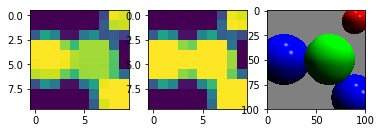

In [121]:
plt.subplot(1,3,1)
imgplot = plt.imshow(normalized_output_target)
plt.subplot(1,3,2)
imgplot = plt.imshow(normalized_output_method)
plt.subplot(1,3,3)
img=mpimg.imread('test01final.bmp')/255
plt.imshow(img)
plt.show()

In [163]:
grid = (10,10)
run_result = run_raytracer('test02.txt', (100,100), grid)


In [164]:
normalized_output_target = get_statistics('totalinstr', run_result, grid)
normalized_output_method = get_statistics('shade', run_result, grid)

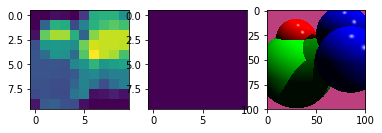

In [165]:
plt.subplot(1,3,1)
imgplot = plt.imshow(normalized_output_target)
plt.subplot(1,3,2)
imgplot = plt.imshow(normalized_output_method)
plt.subplot(1,3,3)
img=mpimg.imread('test02final.bmp')/255
plt.imshow(img)
plt.show()

In [166]:
print('max', normalized_output_target.max())
print('min', normalized_output_target.min())
print('average', np.average(normalized_output_target))

max 621385.0
min 526737.0
average 566325.94


In [167]:
grid = (10,10)
run_result = run_raytracer('test03.txt', (100,100), grid)

In [168]:
normalized_output_target = get_statistics('totalinstr', run_result, grid)
normalized_output_method = get_statistics('shade', run_result, grid)

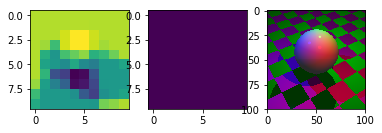

In [171]:
plt.subplot(1,3,1)
imgplot = plt.imshow(normalized_output_target)
plt.subplot(1,3,2)
imgplot = plt.imshow(normalized_output_method)
plt.subplot(1,3,3)
img=mpimg.imread('test03final.bmp')/255
plt.imshow(img)
plt.show()

In [170]:
print('max', normalized_output_target.max())
print('min', normalized_output_target.min())
print('average', np.average(normalized_output_target))

max 516573.0
min 448307.0
average 494688.77


In [172]:
grid = (10,10)
run_result = run_raytracer('test04.txt', (100,100), grid)

In [173]:
normalized_output_target = get_statistics('totalinstr', run_result, grid)
normalized_output_method = get_statistics('shade', run_result, grid)

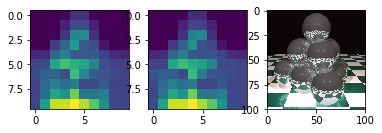

In [174]:
plt.subplot(1,3,1)
imgplot = plt.imshow(normalized_output_target)
plt.subplot(1,3,2)
imgplot = plt.imshow(normalized_output_method)
plt.subplot(1,3,3)
img=mpimg.imread('test04final.bmp')/255
plt.imshow(img)
plt.show()

In [175]:
print('max', normalized_output_target.max())
print('min', normalized_output_target.min())
print('average', np.average(normalized_output_target))

max 4440400.0
min 849687.0
average 1806952.99


In [176]:
grid = (10,10)
run_result = run_raytracer('test05.txt', (100,100), grid)

In [177]:
normalized_output_target = get_statistics('totalinstr', run_result, grid)
normalized_output_method = get_statistics('shade', run_result, grid)

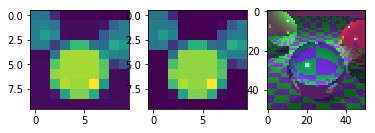

In [178]:
plt.subplot(1,3,1)
imgplot = plt.imshow(normalized_output_target)
plt.subplot(1,3,2)
imgplot = plt.imshow(normalized_output_method)
plt.subplot(1,3,3)
img=mpimg.imread('test05final.bmp')/255
plt.imshow(img)
plt.show()

In [179]:
grid = (10,10)
run_result = run_raytracer('test-texmap.txt', (100,100), grid)

In [180]:
normalized_output_target = get_statistics('totalinstr', run_result, grid)
normalized_output_method = get_statistics('shade', run_result, grid)

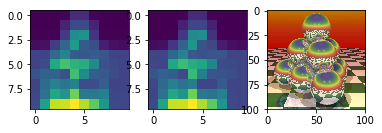

In [181]:
plt.subplot(1,3,1)
imgplot = plt.imshow(normalized_output_target)
plt.subplot(1,3,2)
imgplot = plt.imshow(normalized_output_method)
plt.subplot(1,3,3)
img=mpimg.imread('texmapfinal.bmp')/255
plt.imshow(img)
plt.show()

In [182]:
print('max', normalized_output_target.max())
print('min', normalized_output_target.min())
print('average', np.average(normalized_output_target))

max 3373819.0
min 692087.0
average 1436619.68
